<a href="https://colab.research.google.com/github/pablogarciasanchez/Automatic_Detection_of_Pneumonia_using_Deep_Learning/blob/main/OnlineNewsPopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Autom√°tico - Proyecto Final - Predicci√≥n de Popularidad de una Noticia Online

# Autores

- Pablo Garc√≠a S√°nchez
- Jos√© Antonio L√≥pez Palenzuela

# Nota

Se recomienda leer la memoria. Aunque el contenido es el mismo, en este cuaderno los comentarios se intercalan con celdas de c√≥digo que pueden dificultar la compresi√≥n del mismo.

# 1.Introducci√≥n

En un mundo donde las redes sociales y los medios digitales ya son una de las principales fuentes de informaci√≥n de cualquier ciudadano, predecir el alcance o popularidad de una noticia online se ha convertido en una necesidad primaria para cualquiera cuyo sustento est√© a merced de la opini√≥n p√∫blica. Desde articulistas a pol√≠ticos, pasando por publicistas y activistas.

La popularidad de una publicaci√≥n online puede cuantificarse a trav√©s del n√∫mero de veces que se interacciona con ella: ‚Äúretweets‚Äù, comentarios, veces compartida ‚Ä¶ Luego predecir la popularidad de un art√≠culo podr√≠a entenderse como predecir el n√∫mero de interacciones que tendr√°, un problema de regresi√≥n.

Sin embargo, el enfoque de este proyecto fue distinto, se resolvi√≥ como un problema de clasificaci√≥n binaria (popular/impopular). Para ello, se estableci√≥ de antemano un umbral que divide el espacio de art√≠culos en dos conjuntos: populares, art√≠culos cuyo n√∫mero de interacciones es menor que el umbral; e impopulares, art√≠culos cuyo n√∫mero de interacciones se encuentra por encima del umbral.

En este estudio se implementaron y compararon las prestaciones de los siguientes modelos de clasificaci√≥n: regresi√≥n log√≠stica (RL y Random Forest (RF). El objetivo es determinar qu√© t√©cnica permite determinar mejor si un art√≠culo cualquiera ser√° un √©xito antes de publicarlo.

Mencionar que este proyecto est√° bastante inspirado en el art√≠culo original en el que se plante√≥ este mismo problema [1]. Especialmente la forma en la que se transforma el problema de una aparente regresi√≥n a una clasificaci√≥n binaria. En [1] se combina una primera parte de implementaci√≥n  de modelos predictivos (Random Forest, Adaptive, SVM-RBF, KNN y Na√Øve Bayes), con una segunda parte de refinamiento o optimizaci√≥n del mejor modelo encontrado (RF). Por contra, en este proyecto se implementaron un clasificador lineal (Regresi√≥n Log√≠stica) y 1 clasificadores no-lineales (Random Forest) utilizando un estrategia de entrenamiento y evaluaci√≥n distintas al art√≠culo original (no se utiliza el esquema de ventana deslizante) a fin de encontrar el mejor modelo para la tarea de clasificaci√≥n en cuesti√≥n.


# 2.Conjunto de Datos

### 2.1 Descripci√≥n

El conjunto de datos disponible est√° compuesto por informaci√≥n relativa a los 39.797 art√≠culos que el medio Marshable public√≥ en su web [2] entre el 7 de Enero de 2013 y el 7 de Enero de 2015 (un periodo de 2 a√±os).


Los atributos asociados a cada art√≠culo pueden clasificarse en las siguientes categor√≠as:

- Metadatos: No se utilizan para labores predictivas.

n | Nombre | Descripci√≥n | Tipo |
-|-|-|-|
1 | url | Direcci√≥n URL del art√≠culo | String
2 | tiemdelta | Tiempo desde la publicaci√≥n del art√≠culo a la adquisici√≥n de datos (7 de Enero de 2015) | Num√©rico

- Palabras: Relacionados con el n√∫mero y frecuencia de distintos tipos de palabras.

n | Nombre | Descripci√≥n | Tipo |
-|-|-|-|
3 | n_tokens_title | N√∫mero de palabras del t√≠tulo | Num√©rico
4 | n_tokens_content | N√∫mero de palabras del art√≠culo | Num√©rico
5 | average_token_length | Longitud media por palabra | Num√©rico
6 | n_non_stop_words | Ratio de palabras no-compuestas | Num√©rico
7 | n_unique_tokens | Ratio de palabras √∫nicas | Num√©rico
8 | n_non_stop_unique_tokens | Ratio de palabras √∫nicas no-compuestas | Num√©rico

- Enlaces externos: Relacionados con los enlaces a otras p√°ginas web y art√≠culos de Marshable.

n | Nombre | Descripci√≥n | Tipo |
-|-|-|-|
9 | num_hrefs | N√∫mero total de enlaces | Num√©rico
10 | num_self_hrefs | N√∫mero de enlaces a otros art√≠culos de Marshable | Num√©rico
11 | self_reference_min_shares | N√∫mero de veces compartido (m√≠nimo) de los art√≠culos Marshable enlazados | Num√©rico
12 | self_reference_avg_shares | N√∫mero de veces compartido (m√°ximo) de los art√≠culos Marshable enlazados  | Num√©rico
13 | self_reference_max_shares | N√∫mero de veces compartido (medio) de los art√≠culos Marshable enlazados  | Num√©rico

- Contenido multimedia: N√∫mero de fotos y v√≠deos.

n | Nombre | Descripci√≥n | Tipo |
-|-|-|-|
14 | num_imgs | N√∫mero de im√°genes | Num√©rico
15 | num_videos | N√∫mero de v√≠deos | Num√©rico

- Fecha de Publicaci√≥n: Relacionado con el d√≠a de la semana en el que se public√≥.

n | Nombre | Descripci√≥n | Tipo |
-|-|-|-|
16 | weekday_is_monday | ¬øLunes? | Binaria
17 | weekday_is_tuesday | Martes? | Binaria
18 | weekday_is_wednesday | Mi√©rcoles? | Binaria
19 | weekday_is_thursday | ¬øJueves? | Binaria
20 | weekday_is_friday | ¬øViernes? | Binaria
21 | weekday_is_saturday | ¬øS√°bado? | Binaria
22 | weekday_is_sunday | ¬øDomingo? | Binaria
23 | is_weekend | ¬øFin de semana? | Binaria

- Palabras Clave: Las palabras clave de un art√≠culo se encuentran definidas de antemano. Todo art√≠culo tiene una mejor, peor y media palabra clave, ordenadas en funci√≥n del n√∫mero total de veces que hayan sido compartidos los art√≠culos en los que aparecen. De cada palabra clave, a su vez,  se conoce el n√∫mero m√≠nimo, m√°ximo y medio de veces compartidos de los art√≠culos en los que aparece. Tambi√©n se incluye la categor√≠a formal de Marshable a la que pertenece el art√≠culo.

n | Nombre | Descripci√≥n | Tipo |
-|-|-|-|
24 | num_keywords | N√∫mero de palabras clave | Num√©rica
25 | kw_min_min | N√∫mero de veces compartido (m√≠nimo) de la peor palabra clave | Num√©rica
26 | kw_avg_min | N√∫mero de veces compartido (medio) de la peor palabra clave | Num√©rica
27 | kw_max_min | N√∫mero de veces compartido (m√°ximo) de la peor palabra clave | Num√©rica
28 | kw_min_max | N√∫mero de veces compartido (m√≠nimo) de la mejor palabra clave | Num√©rica
29 | kw_avg_max | N√∫mero de veces compartido (medio) de la mejor palabra clave | Num√©rica
30 | kw_max_max | N√∫mero de veces compartido (m√°ximo) de la mejor palabra clave | Num√©rica
31 | kw_min_avg | N√∫mero de veces compartido (m√≠nimo) de la mejor palabra media | Num√©rica
32 | kw_avg_avg | N√∫mero de veces compartido (medio) de la mejor palabra media | Num√©rica
33 | kw_max_avg | N√∫mero de veces compartido (m√°ximo) de la mejor palabra media | Num√©rica
34 | data_channel_is_lifestyle | ¬øCategor√≠a del art√≠culo = lifesyle? | Binaria
35 | data_channel_is_entertainment | ¬øCategor√≠a del art√≠culo = entertainment? | Binaria
36 | data_channel_is_bus | ¬øCategor√≠a del art√≠culo = bus? | Binaria
37 | data_channel_is_socmed | ¬øCategor√≠a del art√≠culo = socmed? | Binaria
38 | data_channel_is_tech| ¬øCategor√≠a del art√≠culo = tech? | Binaria
39 | data_channel_is_world | ¬øCategor√≠a del art√≠culo = world? | Binaria

- Procesado de Lenguaje Natural: Adquiridos a trav√©s de t√©cnicas de procesado de lenguaje natural como LDA [3] o an√°lisis de sentimientos [4]. El algoritmo LDA permite identificar los 5 temas centrales del conjunto de art√≠culos conocido y la cercan√≠a ([0,1]) de cada art√≠culo a estos. El an√°lisis de sentimientos permite computar distintas medidas relacionadas con el grado de polarizaci√≥n y subjetividad del contenido de un art√≠culo.

n | Nombre | Descripci√≥n | Tipo |
-|-|-|-|
40 | LDA_00 | Cercan√≠a al tema LDA_0 | Binaria
41 | LDA_01 | Cercan√≠a al tema LDA_1 | Binaria
42 | LDA_02 | Cercan√≠a al tema LDA_2 | Binaria
43 | LDA_03 | Cercan√≠a al tema LDA_3 | Binaria
44 | LDA_04 | Cercan√≠a al tema LDA_4 | Binaria
45 | title_subjectivity | Subjetividad del t√≠tulo | Num√©rica
46 | abs_title_subjectivity | Subjetividad absoluta del t√≠tulo | Num√©rica
47 | title_polarity | Polaridad del t√≠tulo | Num√©rica
48 | abs_title_polarity | Subjetividad absoluta del t√≠tulo | Num√©rica
49 | global_rate_positive_words | Ratio total de palabras positivas | Num√©rica
50 | global_rate_negative_words | Ratio total de palabras negativas | Num√©rica
51 | rate_positive_words | Ratio de palabras positivas respecto a neutrales | Num√©rica
52 | rate_negative_words | Ratio de palabras negativas respecto a neutrales | Num√©rica
53 | min_negative_polarity | Polaridad m√≠nima de palabras negativas | Num√©rica
54 | avg_negative_polarity | Polaridad media de palabras negativas | Num√©rica
55 | max_negative_polarity | Polaridad m√°xima de palabras negativas | Num√©rica
56 | min_positive_polarity | Polaridad m√≠nima de palabras positivas | Num√©rica
57 | avg_positive_polarity | Polaridad media de palabras positivas | Num√©rica
58 | max_positive_polarity | Polaridad m√°xima de palabras positivas | Num√©rica
59 | global_subjectivity | Subjetividad del art√≠culo completo | Num√©rica
60 | global_sentiment_polarity | Polaridad del art√≠culo completo | Num√©rica

- Etiqueta: N√∫mero de veces compartido o interacciones.

n | Nombre | Descripci√≥n | Tipo |
-|-|-|-|
61 | shares | N√∫mero de veces compartido | Num√©rico

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Lectura de datos problema: Popularidad de una noticia online
# Carga desde fichero
drive.mount('/content/drive')
data_filepath = '/content/drive/MyDrive/Tercero_Segundo_Cuatrimestre/AA/PF/OnlineNewsPopularity/OnlineNewsPopularity.csv'
df_read_data = pd.read_csv (data_filepath, header=0, delimiter=', ')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


### Transformaci√≥n de Etiquetas

Como ya se ha mencionado, predecir la popularidad de un art√≠culo se enfrent√≥ como un problema de clasificaci√≥n binaria: popular e impopular. Obviamente debe aplicarse alg√∫n tipo de transformaci√≥n a la etiqueta de cada art√≠culo, que es un entero que representa el n√∫mero de veces que se ha compartido un art√≠culo (interacciones). La soluci√≥n fue sencilla, fijar un umbral para el n√∫mero de iteraciones de un art√≠culo que divide el espacio en impopulares (etiqueta < umbraletiquetado) y populares (etiqueta >= umbraletiquetado). Esta forma de transformar un problema de regresi√≥n a clasificaci√≥n provoca que los resultados de este estudio sean poco relevantes en un contexto real, al fin y al cabo este umbral se ha fijado de forma arbitraria y el modelo que mejor clasifique en relaci√≥n a √©ste no tiene por qu√© ser el mejor modelo para cualquier otro. Este podr√≠a ser un aspecto a mejorar en el futuro. La transformaci√≥n se aplic√≥ en el pre-procesamiento de datos, tras dividir el conjunto de datos en entrenamiento y test, ya que se utiliz√≥ la mediana del conjunto de entrenamiento como umbral (al igual que en [1]).


### Sesgo en la toma de datos

Al igual que en [1], se descartaron los art√≠culos m√°s recientes, aquellos publicados hace menos de 3 semanas de la fecha en la que se adquirieron los datos, ya que el n√∫mero de veces que se comparte un art√≠culo no suele estabilizarse (alcanzar su valor real) hasta pasado un tiempo. Se estar√≠a introduciendo un sesgo (los art√≠culos publicados d√≠as antes del 7 de Enero de 2015 son menos populares que el resto) que se sabe a priori que no es cierto. Esta decisi√≥n deriv√≥ en la eliminaci√≥n de un total de 562 art√≠culos, un 1.00% del total, una p√©rdida asumible.


In [ ]:
# Eliminar los art√≠culos cuyo n√∫mero de interacciones no ha alcanzado su m√°ximo
num_orig_art = len(df_read_data)
df_read_data = df_read_data.drop(df_read_data[df_read_data['timedelta'] < 21].index)

In [ ]:
print("N√∫mero original de art√≠culos: {}".format(num_orig_art))
print("Art√≠culos eliminados: {} - {}% del total".format(num_orig_art-len(df_read_data), np.round((num_orig_art-len(df_read_data))*100.0/num_orig_art), 4))
print("N√∫mero final de art√≠culos: {}".format(len(df_read_data)))

N√∫mero original de art√≠culos: 39644
Art√≠culos eliminados: 562 - 1.0% del total
N√∫mero final de art√≠culos: 39082


Recapitulando, del total de art√≠culos (39644) se utilizan 39082. Cada art√≠culo tiene en total 61 variables asociadas (inclu√≠da la etiqueta). A partir de estos datos se debe implementar y evaluar un clasificador que prediga si un art√≠culo ser√° popular.


# 3.Metodolog√≠a

A trav√©s de la biblioteca ScikitLearn [6] se implementaron cada uno de los clasificadores propuestos: Regresi√≥n Log√≠stica (RL) y Random Forest (RF). Antes de implementar cada uno de ellos, se reserv√≥ parte del conjunto de datos (Partici√≥n Entrenamiento-Test, subsecci√≥n 3.1). Salvo que se especifique lo contrario, todos comparten las mismas t√©cnicas de preprocesamiento (Preprocesamiento, subsecci√≥n 3.2). Todos utilizan las mismas m√©tricas de error para evaluar sus prestaciones (M√©tricas de Error, subsecci√≥n 3.3). En esta secci√≥n se describen en detalle estos aspectos comunes.

En la secci√≥n dedicada a la implementaci√≥n y entrenamiento de cada modelo (secciones 4 y 5), se discutir√° la idoneidad del algoritmo de aprendizaje, la funci√≥n p√©rdida, el tipo de regularizaci√≥n, el valor de sus hiperpar√°metros ...

Finalmente, en la secci√≥n de Conclusiones (secci√≥n 6) se seleccionar√° el modelo con mejores prestaciones (validaci√≥n cruzada sobre el conjunto de entrenamiento) y se estimar√° su rendimiento para un caso cualquiera (utilizando el conjunto de test previamente reservado).

## 3.1 Partici√≥n Entrenamiento-Test

Para evitar el ‚Äúdata snooping‚Äù y poder ofrecer una estimaci√≥n lo m√°s realista posible de la generalidad del modelo finalmente propuesto, el primer paso antes de visualizar, preprocesar o entrenar con los datos fue dividir de forma aleatoria el total de datos disponibles en dos conjuntos: entrenamiento (80%) y test (20%).

Recu√©rdese que el objetivo del proyecto es construir un modelo capaz de predecir la popularidad de un art√≠culo cualquiera. Se trata de una demostraci√≥n imposible (infinitos art√≠culos posibles) por lo que es necesario encontrar una estimaci√≥n alternativa de esta generalidad que permita evaluar el modelo finalmente propuesto. Dicho modelo opera en base a una serie de hip√≥tesis o sesgos que aprende de las caracter√≠sticas y patrones subyacentes al sub-espacio de casos conocidos (conjunto de entrenamiento). Sin garant√≠a alguna de que este subespacio sea una muestra representativa del espacio completo, el rendimiento del modelo para este subespacio es una estimaci√≥n demasiado sesgada, demasiado optimista, de la validez de lo aprendido para cualquier caso ("data snooping"). Es por esto que se reserva parte de los casos disponibles (el conjunto de test), para estimar la generalidad del modelo finalmente propuesto de forma menos sesgada, m√°s pesimista. C√≥mo de representativa es esta estimaci√≥n puede aproximarse a trav√©s de la desigualdad de Hoeffding, el tama√±o del conjunto de test y una m√©trica de error cualquiera para dicho conjunto (|Etest|):

<center>

$P( |E_{test}‚àíE_{out} < œµ )  ‚â§  2 ‚ãÖ e^{‚àí2‚ãÖœµ¬∑2‚ãÖ|E_{test}|}$

</center>

En conclusi√≥n, debe reservarse una parte del conjunto de casos disponible (el conjunto de test) que no afecte al funcionamiento del modelo durante ninguna etapa de la implementaci√≥n (preprocesado, estimaci√≥n de hiperpar√°metros, entrenamiento ‚Ä¶) para estimar el rendimiento de dicho modelo fuera del subespacio de casos conocido (el conjunto de entrenamiento) de una forma realista. La generalidad del modelo debe evaluarse ante datos que no sesguen su funcionamiento.

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Partici√≥n aleatoria (semilla=1), 80-20, manteniendo proporci√≥n de las etiquetas.
X_train, X_test, y_train, y_test = train_test_split(
                                        df_read_data.drop(columns = ['shares']),
                                        df_read_data['shares'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
)


## 3.2 Visualizaci√≥n de Datos y Pre-Procesamiento

Salvo que se especifique lo contrario, se aplicaron las mismas t√©cnicas de preprocesamiento en todos los modelos. Estas t√©cnicas se aplican al conjunto de test y entrenamiento previa utilizaci√≥n en los modelos; sin embargo, las decisiones √∫nicamente deben estar motivadas por el conjunto de entrenamiento (evitar ‚Äúdata snooping‚Äù).

### 3.2.1 Eliminaci√≥n de atributos irrelevantes

Como se exige en [1], se eliminaron los atributos ‚Äútimedelta‚Äù (d√≠as entre la publicaci√≥n del art√≠culo y la obtenci√≥n de los datos) y ‚Äúurl‚Äù (direcci√≥n URL del art√≠culo) ya que son atributos que no influyen en el proceso predictivo.

In [ ]:
# Eliminar los atributos no-predictivos
X_train = X_train.drop(columns=['timedelta','url'])

### 3.2.2 Imputaci√≥n de Valores Ausentes

No existen valores ausentes en el conjunto de entrenamiento ni en el conjunto de test (leve espionaje de datos). Sin embargo, esto no implica que en la pr√°ctica el modelo no tenga que enfrentarse a ellos. Si en un futuro se necesita una t√©cnica para la imputaci√≥n de datos perdidos, se recurrir√≠a al criterio descrito en el gui√≥n del proyecto.

### 3.2.3 Varibales Categ√≥ricas

Como ya se ha mencionado se encuentran codificadas (de la forma one-hot-encoding) de antemano (consultar [5]).

In [ ]:
# Identificaci√≥n de variables que est√°n binarizadas (proceden de la codificaic√≥n de categ√±oricas)
binary_cols = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
               'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world',
               'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
               'weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
for c in binary_cols:
 print('Valores posibles de la varibale {}: {}'.format(c, X_train[c].unique() ))

Valores posibles de la varibale data_channel_is_lifestyle: [0. 1.]
Valores posibles de la varibale data_channel_is_entertainment: [0. 1.]
Valores posibles de la varibale data_channel_is_bus: [0. 1.]
Valores posibles de la varibale data_channel_is_socmed: [0. 1.]
Valores posibles de la varibale data_channel_is_tech: [1. 0.]
Valores posibles de la varibale data_channel_is_world: [0. 1.]
Valores posibles de la varibale weekday_is_monday: [0. 1.]
Valores posibles de la varibale weekday_is_tuesday: [1. 0.]
Valores posibles de la varibale weekday_is_wednesday: [0. 1.]
Valores posibles de la varibale weekday_is_thursday: [0. 1.]
Valores posibles de la varibale weekday_is_friday: [0. 1.]
Valores posibles de la varibale weekday_is_saturday: [0. 1.]
Valores posibles de la varibale weekday_is_sunday: [0. 1.]
Valores posibles de la varibale is_weekend: [0. 1.]


### 3.2.4 Varibales Num√©ricas

A continuaci√≥n se muestra una tabla con informaci√≥n relativa de cada varibale num√©rica: media, desviaci√≥n t√≠pica, valores m√≠nimos y m√°ximos y percentiles.

In [ ]:
# Identificaci√≥n de variables num√©ricas
numeric_cols = np.setdiff1d(X_train.columns, binary_cols)
# Tabla: Media, desviaci√≥n t√≠pica, valores m√≠nimos, m√°ximos y percentiles de las varibales num√©ricas.
X_train[numeric_cols].describe()

LDA_00        LDA_01        LDA_02        LDA_03        LDA_04  \
count  31265.000000  31265.000000  31265.000000  31265.000000  31265.000000   
mean       0.183949      0.141088      0.214871      0.224043      0.236017   
std        0.262239      0.219470      0.281239      0.295671      0.290618   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.025048      0.025010      0.028571      0.026278      0.028574   
50%        0.033382      0.033345      0.040003      0.040001      0.040965   
75%        0.240929      0.150902      0.327994      0.376993      0.405311   
max        0.920000      0.925947      0.919999      0.926534      0.927191   

       abs_title_sentiment_polarity  abs_title_subjectivity  \
count                  31265.000000            31265.000000   
mean                       0.155572                0.342195   
std                        0.225953                0.188433   
min                        0.000000                0.000000   
25%                        0.000000                0.166667   
50%                        0.000000                0.500000   
75%                        0.250000                0.500000   
max                        1.000000                0.500000   

       average_token_length  avg_negative_polarity  avg_positive_polarity  \
count          31265.000000           31265.000000           31265.000000   
mean               4.556425              -0.259751               0.354920   
std                0.822547               0.127067               0.103720   
min                0.000000              -1.000000               0.000000   
25%                4.479876              -0.327929               0.306782   
50%                4.664122              -0.253582               0.359185   
75%                4.855670              -0.187500               0.411979   
max                8.041534               0.000000               1.000000   

       ...  num_keywords  num_self_hrefs    num_videos  rate_negative_words  \
count  ...  31265.000000    31265.000000  31265.000000         31265.000000   
mean   ...      7.234671        3.311626      1.270270             0.288011   
std    ...      1.905398        3.878145      4.138338             0.155690   
min    ...      1.000000        0.000000      0.000000             0.000000   
25%    ...      6.000000        1.000000      0.000000             0.185714   
50%    ...      7.000000        3.000000      0.000000             0.280000   
75%    ...      9.000000        4.000000      1.000000             0.384615   
max    ...     10.000000      116.000000     91.000000             1.000000   

       rate_positive_words  self_reference_avg_sharess  \
count         31265.000000                31265.000000   
mean              0.683779                 6491.992524   
std               0.188161                25008.072748   
min               0.000000                    0.000000   
25%               0.600000                  983.000000   
50%               0.711111                 2200.000000   
75%               0.800000                 5175.000000   
max               1.000000               843300.000000   

       self_reference_max_shares  self_reference_min_shares  \
count               31265.000000               31265.000000   
mean                10498.844752                4064.525965   
std                 42178.200253               20637.930728   
min                     0.000000                   0.000000   
25%                  1100.000000                 640.000000   
50%                  2900.000000                1200.000000   
75%                  7900.000000                2600.000000   
max                843300.000000              843300.000000   

       title_sentiment_polarity  title_subjectivity  
count              31265.000000        31265.000000  
mean                   0.071247            0.281508  
std                    0.264919            0.323845  
min                 

Se observ√≥ que los valores de estos atributos para los art√≠culos del conjunto de entrenamiento se encuentran distribuidos en escalas dram√°ticamente distintas. Esta diferencia de escala puede afectar negativamente al funcionamiento de alguno de los modelos implementados (RL) [7]. Para solventar esta problem√°tica se estandarizaron los valores de cada uno de estos atributos num√©ricos. Estandarizar es una t√©cnica de re-escalado que consiste en restar la media y dividir entre la varianza del atributo a cada valor de este. Ejemplo de estandarizaci√≥n para el n√∫mero de palabras total del art√≠culo (n_tokens_content) y el m√°ximo de veces que se comparte la palabra clave m√°s compartida de un art√≠culo (kw_max_max).

In [ ]:
# Instacnciaci√≥n del escalor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

In [ ]:
transformed = scaler.fit_transform(X_train[['n_tokens_content', 'kw_max_max']])

In [ ]:
transformed = pd.DataFrame(transformed, columns = scaler.get_feature_names_out(['n_tokens_content' , 'kw_max_max']))

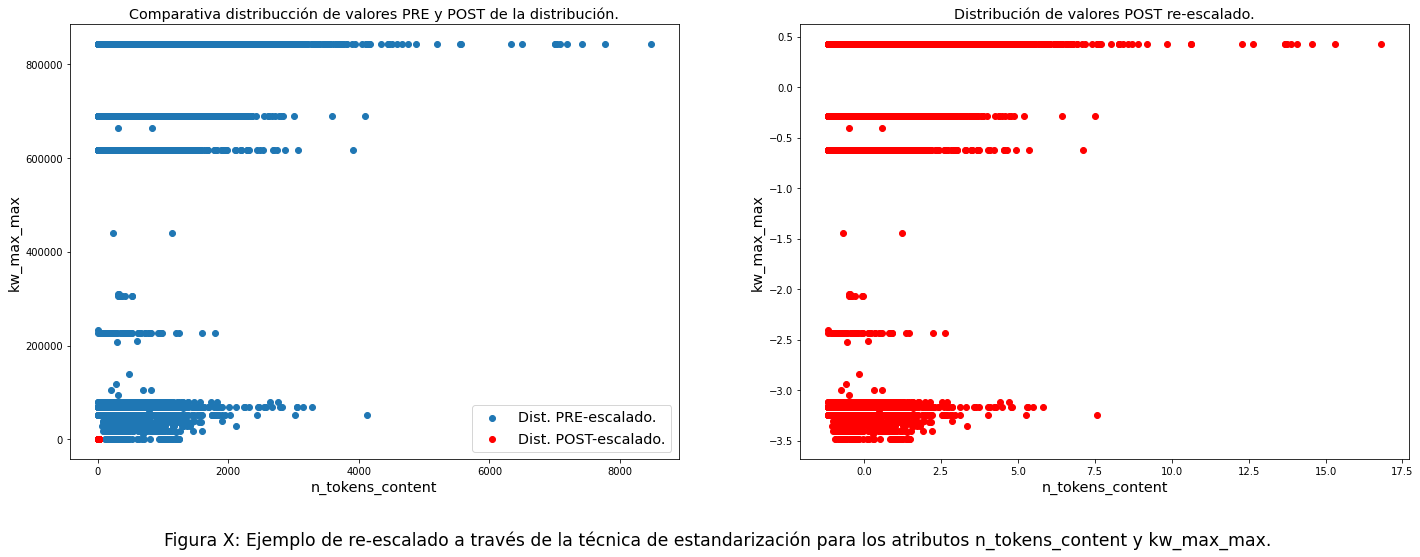

In [ ]:
# Figura
fig, axes = plt.subplots(1,2)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*4)

axes[0].scatter(X_train[['n_tokens_content']], X_train[['kw_max_max']], label='Dist. PRE-escalado.')
axes[0].scatter(transformed[['n_tokens_content']], transformed[['kw_max_max']], color='r', label='Dist. POST-escalado.')
axes[0].set_title('Comparativa distribucci√≥n de valores PRE y POST de la distribuci√≥n.', fontsize='x-large')
axes[0].set_xlabel('n_tokens_content', fontsize='x-large')
axes[0].set_ylabel('kw_max_max', fontsize='x-large')

axes[1].scatter(transformed[['n_tokens_content']], transformed[['kw_max_max']], color='r', label='Dist. POST-escalado.')
axes[1].set_title('Distribuci√≥n de valores POST re-escalado.', fontsize='x-large')
axes[1].set_xlabel('n_tokens_content', fontsize='x-large')
axes[1].set_ylabel('kw_max_max', fontsize='x-large')


# T√≠tulo
#fig.suptitle('Figura 1: Ejemplo de estandarizaci√≥n. Una escala mucho m√°s comparable.', fontsize = "xx-large", y=0)
fig.suptitle('Figura X: Ejemplo de re-escalado a trav√©s de la t√©cnica de estandarizaci√≥n para los atributos n_tokens_content y kw_max_max.', fontsize = "xx-large", y=0)
axes[0].legend(fontsize='x-large')
plt.show()

Como puede observarse, se trata de una transformaci√≥n lineal que mantiene las distancias entre valores (la forma de la distribuci√≥n) re-escalando sus valores a una escala m√°s manejable para el algoritmo de aprendizaje de ciertos modelos como la RL.

In [ ]:
transformed.describe()

n_tokens_content    kw_max_max
count      3.126500e+04  3.126500e+04
mean       8.226978e-17 -1.706757e-16
std        1.000016e+00  1.000016e+00
min       -1.158931e+00 -3.484515e+00
25%       -6.349477e-01  4.277493e-01
50%       -2.912829e-01  4.277493e-01
75%        3.536190e-01  4.277493e-01
max        1.681771e+01  4.277493e-01

Antes del re-escalado n_token_content ‚àà [0, 8000] y kw_max_max‚àà [0, 800000] (hasta 2 √≥rdenes de magnitud de diferencia). Despu√©s del re-escalado n_tokens_content ‚àà [-1.16, 1.68] y kw_max_max‚àà [-3.52, 0.42]. Matizar que esta t√©cnica no es robusta frente a valores an√≥malamente altos, podr√≠a discutirse la adecuaci√≥n de un t√©cnica de re-escalado de este tipo.

### 3.2.5 Etiquetas

Al igual que en [1], el umbral seleccionado para re-etiquetar los datos fue la mediana de las etiquetas del  conjunto de entrenamiento 1400 interacciones (iteraciones). Convenientemente, este umbral genera una distribuci√≥n balanceada de las etiquetas para el conjunto de entrenamiento: 56.16% de art√≠culos que son populares y 46.84% que no lo son.

In [ ]:
# Tranformaci√≥n de etiquetas
umbral = df_read_data['shares'].median()
df_read_data['shares'][df_read_data['shares'] < umbral] = -1 # Art√≠culos impopulares
df_read_data['shares'][df_read_data['shares'] >= umbral ] = 1 # Art√≠culos populares
df_read_data.rename(columns={'shares':'popularidad'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Tranformaci√≥n de etiquetas
umbral = y_train.median()
y_train[y_train < umbral] = -1 # Art√≠culos impopulares
y_train[y_train >= umbral ] = 1 # Art√≠culos populares

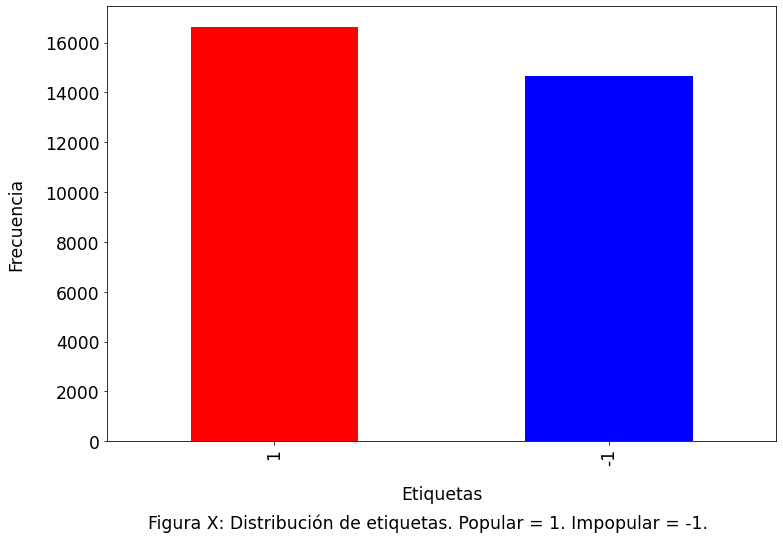

In [ ]:
# DDistribuci√≥n gr√°fica de la figura
fig, axe = plt.subplots(1,1)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
fig.suptitle('Figura X: Distribuci√≥n de etiquetas. Popular = 1. Impopular = -1. ', fontsize = "xx-large", y=0)
axe.tick_params(labelsize = "xx-large")
axe.set_xlabel("Etiquetas", labelpad=20.0, fontsize = "xx-large")
axe.set_ylabel("Frecuencia", labelpad=20.0, fontsize = "xx-large")
y_train.value_counts().plot.bar(color = ['red','blue'])
plt.show()

In [ ]:
print("Porcentaje total de art√≠culos populares (1): ",np.round(len(y_train[y_train == 1]) / len(y_train) * 100,2),"%")
print("Porcentaje total de art√≠culos impopulares (-1): ",np.round(len(y_train[y_train ==-1]) / len(y_train) * 100,2),"%")

Porcentaje total de art√≠culos populares (1):  53.16 %
Porcentaje total de art√≠culos impopulares (-1):  46.84 %


### 3.2.6 Implementaci√≥n del Preprocesado

In [ ]:
# Pre-procesado de datos
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', StandardScaler(), numeric_cols),
                    ],
                    remainder='passthrough'
                )

## 3.3 Evaluaci√≥n de Modelos

### 3.3.1 M√©tricas de Error

Para caracterizar adecuadamente el funcionamiento de los modelos se calcul√≥ la accuracy, precision, recall, F1, con un umbral-de-decisi√≥n = 0.5. Recu√©rdese que los algoritmos implementados emplean un enfoque estad√≠stico, predicen la probabilidad (p) de que un caso pertenezca a una determinada clase, probabilidad que se transforma en etiqueta si p > umbral-de-decisi√≥n, con umbral-de-decisi√≥n ‚àà [0, 1]. No confundir este umbral con el utilizado para etiquetar los datos.

Dado que se trata de una muestra balanceada, la accuracy fue la m√©trica utilizada como referencia para comparar modelos.

A modo de marco de referencia respecto al que valorar el valor de estas m√©tricas para cada modelo concreto, se crearon 3 modelos de prueba o dummies: uno que responde siempre en positivo, otro que responde siempre en negativo, otro que responde de forma aleatoria. El error de estos clasificadores de prueba para un conjunto de datos con la misma distribuci√≥n de etiquetas que el conjunto de entrenamiento es el siguiente.

In [ ]:
# Creaci√≥n y evaluaci√≥n de dummies
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Predicciones de los Dummies para el conjunto de entrenamiento
et_siempre_pos = [1 for e in y_train]
et_siempre_neg = [-1 for e in y_train]
et_aleatorias = [np.random.choice([-1,1]) for e in y_train]

results = []
results.append(et_siempre_pos)
results.append(et_siempre_neg)
results.append(et_aleatorias)

dummies = ['Positivo', 'Negativo', 'Aleatorio']

# Tabla de resultados
tabla = pd.DataFrame(columns = ['Dummy', 'precision' , 'recall', 'f1', 'accuracy'])
for i,d in enumerate(dummies):
  p = precision_score(y_train, results[i], zero_division=0)
  r = recall_score(y_train, results[i], zero_division=0)
  f1 = f1_score(y_train, results[i], zero_division=0)
  a = accuracy_score(y_train, results[i])
  tabla=tabla.append({'Dummy':dummies[i], 'precision':p , 'recall':r, 'f1':f1, 'accuracy':a}, ignore_index=True)

print("Tabla 1: Prestaciones de referencia para evaluar los modelos implementados. Matizar que la precision, el recall y F1 son relativas a la etiqueta positiva (=popular=1).")
tabla

Tabla 1: Prestaciones de referencia para evaluar los modelos implementados. Matizar que la precision, el recall y F1 son relativas a la etiqueta positiva (=popular=1).


Dummy  precision    recall        f1  accuracy
0   Positivo   0.531649  1.000000  0.694218  0.531649
1   Negativo   0.000000  0.000000  0.000000  0.468351
2  Aleatorio   0.531338  0.497774  0.514009  0.499568

### 3.3.2 Validaci√≥n Cruzada

Cada vez que se quiso evaluar un modelo candidato para compararlo con otros, en lugar de ofrecer el valor de  las m√©tricas previamente descritas sobre el propio conjunto de entrenamiento (valores demasiado sesgados/optimistas) o sobre el conjunto de test (‚Äúdata snooping‚Äù) se utiliz√≥ una t√©cnica de validaci√≥n conocida como validaci√≥n cruzada. De forma aleatoria se divide el conjunto de entrenamiento en k partes. Se entrena y eval√∫a el algoritmo k veces. Para cada una de las veces, se utiliza una parte distinta para evaluar el modelo y las k-1 restantes para entrenarlo. La combinaci√≥n (media) de las prestaciones del modelo en estos k escenarios son una estimaci√≥n algo m√°s realista de la generalidad del modelo que probarlo para una partici√≥n cualquiera (menor riesgo de "overfitting"). En el contexto de la estimaci√≥n experimental de hiperpar√°metros, la funcionalidad GridSearchCV de ScikitLearn permite construir de forma autom√°tica un modelo para cada combinaci√≥n de hiperpar√°metros y aplicar esta t√©cnica de validaci√≥n (CV) para cada uno de ellos. Si bien el gui√≥n seguido en este proyecto proh√≠be su uso para determinar TODOS los hiperpar√°metros en una misma llamada, esperamos que utilizarlo de forma puntual y jsutificada, para alguno de ellos, sea tolerable.

# 4.Regresi√≥n Log√≠stica

El primer modelo implement√≥ una regresi√≥n log√≠stica (entrop√≠a cruzada) con SGD como algoritmo de aprendizaje. Obviamente la funci√≥n coste o p√©rdida a optimizar fue la entrop√≠a cruzada.

<center>

$E_{in}(w)=\frac{1}{N}‚àëln(1+e^{-y_nw^Tx_n})$

</center>

Esta funci√≥n coste y este algoritmo de aprendizaje admiten dos tipos de regularizaci√≥n: Ll y L2. Ambas a√±aden un t√©rmino a la funci√≥n coste dependiente de los coeficientes a estimar (predictores) que penaliza el valor de la funci√≥n p√©rdida cuanto mayor sea el valor estos. El peso de esta penalizaci√≥n puede ajustarse a trav√©s de par√°metro ùúÜ. L1 penaliza la suma del valor absoluto de los predictores. Provoca que los predictores tiendan a cero, anulando el peso de los atributos m√°s irrelevantes. L2 penaliza la suma de los predictores al cuadrado. Provoca que se reduzca de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero.

<center>

$L_1 \rightarrow E_{in}(w)= \lambda_{L_1}¬∑\sum ||w|| + \frac{1}{N}‚àëln(1+e^{-y_nw^Tx_n}) $

</center>

<center>

$L_2 \rightarrow E_{in}(w)= \lambda_{L_2}¬∑\sum ||w||^2 + \frac{1}{N}‚àëln(1+e^{-y_nw^Tx_n}) $

</center>


Los resultados de [1], donde se observ√≥ que los atributos relacionados con las palabras clave de un art√≠culo tienen mucha m√°s importancia (de cara a la popularidad) que el resto, sugirieron el uso de L1 (suele provocar la eliminaci√≥n de los menos relevantes).


### 4.1 Estimaci√≥n de Hiperpar√°metros

En base a lo anteriormente descrito y a la implementaci√≥n del modelo ofrecida por ScikitLearn (SGDClassifier), los hiperpar√°metros a determinar son los siguientes: la tasa de aprendizaje y el criterio de parada del SGD, el tipo regularizaci√≥n y el coeficiente ùúÜ  que ajusta su influencia.

- SGD:
  - Criterio de parada: Early Stopping, para evitar el sobreajuste. Requiere de tres par√°metros adicionales: proporci√≥n de datos utilizados para la validaci√≥n (validation_fraction), n√∫mero de √©pocas sin mejorar (n_iter_no_mejora) y la tolerancia (tol). El algoritmo se detiene cuando el valor de la funci√≥n coste para el conjunto de validaci√≥n tras una iteraci√≥n es mayor que el m√≠nimo valor encontrado menos la tolerancia durante n_iter_no_mejora iteraciones del algoritmo. Los valores utilizados fueron los siguientes.
    - n_iter_no_mejora = 20
    - tol = 0.00001
    - validation_fraction = 20 %

- Tasa de aprendizaje: √ìptima. Recomendada ScikitLearn. Basada en una heur√≠stica propuesta por Leon Bottou. Utiliza el valor de ùúÜ.

- Regularizaci√≥n:
  - Tipo: L1. Como ya se ha comentado, los resultados de [1] sugieren este tipo de regularizaci√≥n
  - ùúÜ: Influencia de la penalizaci√≥n de la regularizaci√≥n L1. Coeficiente determinado de forma experimental a trav√©s de un proceso de validaci√≥n cruzada sobre el conjunto de entrenamiento (GridSearchCV). Valores evaluados: 0.0 (ninguna), 0.00001, 0.0001 (valor por defecto de ScikitLearn), 0.001, 0.01, 0.1 y 1. √âste es uno de esos casos en los que esperamos que si este permitido el uso de esta herramienta (estimar un √∫nico hiperpar√°metro de forma justificada).


## 4.2 Resultados Experimentales

### 4.2.1 Coeficiente de Regularizaci√≥n

El mejor valor m√°s adecuado para $\lambda$ es aquel que provoc√≥ una mayor accuracy (recu√©rdese, m√©trica de referencia): $ùúÜ=0.01$. La primera celda de c√≥digo, despu√©s de los imports, implementa, entrena y eval√∫a un clasificador sin regularizaci√≥n $\lambda = 0.0$. La segunda celda de c√≥digo, implementa, entrena y eval√∫a distintos clasificadores log√≠sticos en funci√≥n del valor de $\lambda$ (a trav√©s de la herramienta GridSearchCV).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import multiprocessing

In [ ]:
# Modelo SIN REGULARIZACION
modelo = SGDClassifier(
                        loss='log',
                        learning_rate='optimal',
                        penalty='none',
                        alpha=0.0001,
                        early_stopping=True,
                        validation_fraction = 0.2,
                        tol=0.00001,
                        n_iter_no_change=20,
                        random_state = 1234
)

# Pipeline
pipe_rl = Pipeline([('preprocessing', preprocessor),('RL', modelo)])

# Evaluaci√≥n del modelo
cv_scores = cross_validate(
                estimator = pipe_rl,
                X         = X_train,
                y         = y_train,
                scoring = ('accuracy'),
                cv        = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234),
                n_jobs     = multiprocessing.cpu_count() - 1,
                verbose = 0
)
print('Resultados de la accuracy (media y dt) cuando ùúÜ=0 (sin regularizaci√≥n L1): {} - {}'.format(np.round(cv_scores['test_score'].mean(), 4), np.round(cv_scores['test_score'].std(), 4)))

Resultados de la accuracy (media y dt) cuando ùúÜ=0 (sin regularizaci√≥n L1): 0.5967 - 0.0372


In [ ]:
# Modelos con REGULARIZACION L1 y alpha = {0.00001, 0.0001, 0.001, 0.01, 0.1, 1}
modelo = SGDClassifier(
                        loss='log',
                        learning_rate='optimal',
                        penalty='none',
                        alpha=0.0001,
                        early_stopping=True,
                        validation_fraction = 0.2,
                        tol=0.00001,
                        n_iter_no_change=20,
                        random_state = 1234
)

# Pipeline: preprocesado + modelo
pipe_rl = Pipeline([('preprocessing', preprocessor),('RL', modelo)])

# Valores posibles: el valor 0.0 debe aplicarse por separado
param_grid = {'RL__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

#Se realiza crossvalidation (5 particiones) del modelo para cada valor del hiperpar√°metro
grid = GridSearchCV(
        estimator  = pipe_rl,
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234),
        verbose = 0
)

# Ajuste
_ = grid.fit(X = X_train, y = y_train)

# Resultados
print('Resultados de la accuracy para varios modelos candidatos, cada uno entrenado con un ùúÜ distinto.')
print('Los resultados proceden de aplicar validaci√≥n cruzada (5 particiones) sobre el conjunto de entrenamiento a cada modelo candidato.')
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

Resultados de la accuracy para varios modelos candidatos, cada uno entrenado con un ùúÜ distinto.
Los resultados proceden de aplicar validaci√≥n cruzada (5 particiones) sobre el conjunto de entrenamiento a cada modelo candidato.


param_RL__alpha  mean_test_score  std_test_score
3            0.01         0.647113        0.005449
4             0.1         0.642987        0.005999
2           0.001         0.634767        0.024471
5               1         0.607388        0.010077
1          0.0001         0.596674        0.037220
0         0.00001         0.570126        0.022244

### 4.2.2 Prestaciones del Modelo

Evaluando el mejor clasificador log√≠stico encontrado ($ùúÜ=0.01$) sobre el conjunto de entrenamiento utilizando validaci√≥n cruzada con 5 particiones, se obtienen los siguientes resultados.

In [ ]:
# Modelo
modelo = SGDClassifier(
                        loss='log',
                        learning_rate='optimal',
                        penalty='l1',
                        alpha=0.01,
                        early_stopping=True,
                        validation_fraction = 0.2,
                        tol=0.00001,
                        n_iter_no_change=20,
                        random_state = 1234
)

# Pipeline
pipe_rl = Pipeline([('preprocessing', preprocessor),('RL', modelo)])

# Evaluaci√≥n del modelo
from sklearn.model_selection import cross_validate
cv_scores = cross_validate(
                estimator = pipe_rl,
                X         = X_train,
                y         = y_train,
                scoring = ('precision','recall','f1','accuracy'),
                cv        = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234),
)

In [ ]:
print('Prestaciones globales del modelo RL (validaci√≥n cruzada sobre el conjunto de entrenamiento, 5 particiones).')
print('Precision: {}'.format(np.round(cv_scores['test_precision'].mean(), 4)))
print('Recall: {}'.format(np.round(cv_scores['test_recall'].mean(), 4)))
print('F1: {}'.format(np.round(cv_scores['test_f1'].mean(), 4)))
print('Accuracy: {}'.format(np.round(cv_scores['test_accuracy'].mean(), 4)))
print('Tiempo: {}'.format(np.round(cv_scores['fit_time'].mean(), 4)))

Prestaciones globales del modelo RL (validaci√≥n cruzada sobre el conjunto de entrenamiento, 5 particiones).
Precision: 0.6378
Recall: 0.7374
F1: 0.6839
Accuracy: 0.6377
Tiempo: 0.771


### 4.2.3 Curva de Aprendizaje

A fin de comprobar que el modelo est√° aprendiendo, se gener√≥ la curva de aprendizaje para una de las particiones anteriores. Como puede observarse, las prestaciones del modelo (accuracy) para el conjunto de entrenamiento y de validaci√≥n crecen con la proporci√≥n de datos utilizados (del conjunto de entrenamiento) durante el entrenamiento. Efectivamente, el modelo est√° aprendiendo

In [ ]:
# Curva de apredizaje del proceso anterior (priemra de las particiones)
from sklearn.metrics import accuracy_score

# Genero particiones
cv= StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234)

primera = True
c = X_train.columns

train_scores = []
val_scores = []

for train_index, val_index in cv.split(X_train, y_train):
  # Para la primera partici√≥n (redundante hacerlo para el resto)
  if(primera):
    train_sizes = np.arange(10, len(train_index), 100)
    # Almacenamos el errro conforme aumenta el tama√±o de los datos con los que se entrena
    for size in np.arange(10, len(train_index), 100):
      # Error de entrenamiento
      X_train_split = pd.DataFrame(columns = c, data = X_train.to_numpy()[train_index])
      y_train_split = y_train.to_numpy()[train_index]
      X_train_split_size = pd.DataFrame(columns = c, data = X_train.to_numpy()[train_index[0:size]])
      y_train_split_size = y_train.to_numpy()[train_index[0:size]]
      pipe_rl.fit(X_train_split_size, y_train_split_size)
      y_train_split_pred = pipe_rl.predict(X_train_split)
      train_scores.append(accuracy_score(y_train_split, y_train_split_pred))
      # Error de validaci√≥n
      X_val_split = pd.DataFrame(columns = c, data = X_train.to_numpy()[val_index])
      y_val_split = y_train.to_numpy()[val_index]
      y_val_split_pred = pipe_rl.predict(X_val_split)
      val_scores.append(accuracy_score(y_val_split, y_val_split_pred))
      print("{} de {}".format(size, len(train_index)))
    primera = False

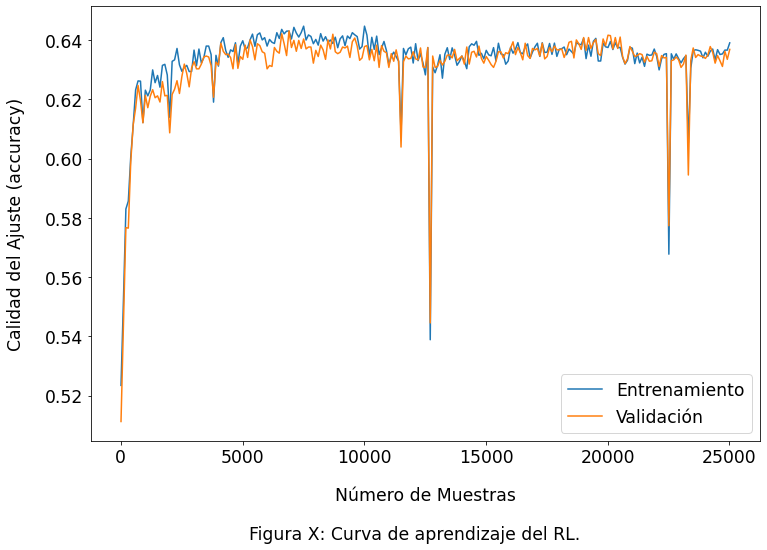

In [ ]:
#Plotear Curva de aprendizaje
fig, axe = plt.subplots(1,1)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
fig.suptitle('Figura X: Curva de aprendizaje del RL.', fontsize = "xx-large", y=-0.02)

axe.tick_params(labelsize = "xx-large")
axe.set_xlabel("N√∫mero de Muestras", labelpad=20.0, fontsize = "xx-large")
axe.set_ylabel("Calidad del Ajuste (accuracy)", labelpad=20.0, fontsize = "xx-large")
axe.plot(train_sizes, train_scores, label='Entrenamiento')
axe.plot(train_sizes, val_scores, label='Validaci√≥n')

plt.legend(fontsize='xx-large')
plt.show()

# 5.Random Forest

El segundo modelo implementado fue un RandomForest. Este tipo clasificador fue elegido por ser uno de los modelos de referencia en el √°mbito de la predicci√≥n, tanto en regresi√≥n como en clasificaci√≥n (problema que nos ata√±e).

Se trata de un modelo formado por distintos √°rboles de decisi√≥n, cada uno entrenado con una muestra aleatoria ligeramente distinta de los datos de entrenamiento (bootstrap). La predicci√≥n de un modelo RF es el agregado de las predicciones sugeridas por cada uno de los √°rboles que lo conforman (aggregation).


## 5.1 Estimaci√≥n de Hiperpar√°metros

La mayor√≠a de hiperpar√°metros que el modelo utiliza no fueron discutidos con demasiada profundidad durante el curso con lo que salvo el n√∫mero de √°rboles, se utilizaron los valores por defecto que la biblioteca ScikitLearn propone (extensamente probados por sus desarrolladores).

N√∫mero de √°rboles: Un nombre bastante auto-descriptivo. Cuanto mayor sea, mejor. Un exceso de √°rboles no provoca overfitting, pero a partir de un umbral cr√≠tico el rendimiento apenas mejora, mientras que el coste computacional sigue aumentando. Para determinar el valor √≥ptimo de √©ste hiperpar√°metro, en lugar de recurrirse a la validaci√≥n cruzada, como en el resto de modelos, se comprob√≥ el valor del OOB-Error para un n√∫mero creciente de √°rboles: de 1 a 200, de 5 en 5 (1, 6, 11, 16 ‚Ä¶) y de 200 a 450, de 50 en 50 (200, 250, 300 ‚Ä¶).

La utilizaci√≥n del OOB-Error como t√©cnica de validaci√≥n, es propia de modelos que utilizan ‚Äúbagging‚Äù (‚Äúbootstrap agregation‚Äù). En el caso concreto de los clasificadores RF, cada uno de los √°rboles que componen el modelo ajusta/entrena con un subconjunto de observaciones aleatorio distinto, luego √©ste puede utilizarse (sin temor al ‚Äúdata snooping‚Äù) para estimar el la etiqueta del conjunto de observaciones que no ha utilizado (observaciones Out-Of-Bag); en otras palabras, un √°rbol puede utilizarse para validar lo aprendido sobre aquellas observaciones que no utiliza. De esta manera puede comprobarse la validez del ajuste y del valor de los hiperpar√°metros sin necesidad de recurrir a otras t√©cnicas como la validaci√≥n cruzada [11]. El OOB-Error que devuelve la implementaci√≥n del modelo utilizado (RandomForestClassifier de ScikitLearn) coincide con la accuracy (n√∫mero de predicciones correctas).

## 5.2 Resultados Experimentales

### 5.2.1 N√∫mero de √Årboles

Como ya se adelant√≥, puede observarse en la siguiente figura que cuanto mayor sea el n√∫mero de √°rboles mejor es el rendimiento del modelo (estimado a trav√©s del OOB-error). Sin embargo, la mejora de accuracy empieza a frenar en torno a los 30 √°rboles, estanc√°ndose en un OOB-Error de 0.66 a partir de los 165 √°rboles, mientras que el tiempo de ejecuci√≥n se dispara. Se escogi√≥ como valor √≥ptimo del n√∫mero de √°rboles, una cantidad (200 √°rboles) con OOB-Error cercano al mejor (accuracy = 0.6636) que conserva un tiempo de ejecuci√≥n razonable (33.16 s).

In [ ]:
# Estimaci√≥n del n√∫mero de √°rboles a trav√©s del m√©todo de validaci√≥n OOB-Error
from sklearn.ensemble import RandomForestClassifier
import time

time_scores = []
oob_scores   = []

# Valores posibles del n¬∫ de √°rboles
rango_val_n_arb = np.concatenate((np.array([1]), np.arange(5, 200, 5)))
rango_val_n_arb = np.concatenate((rango_val_n_arb, np.arange(200, 500, 50)))

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# Out-of-Bag y su tiempo de entrenamiento.
for i, n_arboles in enumerate(rango_val_n_arb):
  # Modelo
  modelo = RandomForestClassifier(
      n_estimators=n_arboles,
      criterion='gini',
      max_depth=None,
      min_samples_split=2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features='sqrt',
      max_leaf_nodes=None,
      min_impurity_decrease=0.0,
      bootstrap=True,
      oob_score=True,
      n_jobs=None,
      random_state=1234,
      verbose=0,
      warm_start=False,
      class_weight=None,
      ccp_alpha=0.0,
      max_samples=None
  )
  # Pipeline
  pipe_rf = Pipeline([('preprocessing', preprocessor),('RF', modelo)])
  #Entrenamiento
  t0 = time.time()
  _ = pipe_rf.fit(X_train, y_train)
  t1 = time.time()
  # Almacenamiento de resultados
  oob_scores.append(modelo.oob_score_)
  time_scores.append(t1-t0)
  print("Comprobado el valor: {}".format(rango_val_n_arb[i]))


In [ ]:
# Plotear evoluci√≥n de OOB-error y del tiempo del ajuste con el n√∫mero de √°rboles
fig, axes = plt.subplots(1,2)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*4)
fig.suptitle('Figura X: OOB-Error (accuracy) y el tiempo de ejecuci√≥n respecto al n√∫mero de √°rboles del modelo.', fontsize = "xx-large", y=-0.02)

# Evoluci√≥n de OOB-error con el n√∫mero de √°rboles
axes[0].tick_params(labelsize = "xx-large")
axes[0].set_xlabel("N√∫mero de √Årboles", labelpad=20.0, fontsize = "xx-large")
axes[0].set_ylabel("OOB-Error (accuracy)", labelpad=20.0, fontsize = "xx-large")
axes[0].plot(rango_val_n_arb, oob_scores, c='r')

# Evoluci√≥n del tiempo de ajuste con el n√∫mero de √°rboles
axes[1].tick_params(labelsize = "xx-large")
axes[1].set_xlabel("N√∫mero de √Årboles", labelpad=20.0, fontsize = "xx-large")
axes[1].set_ylabel("Tiempo Ejecuci√≥n [s]", labelpad=20.0, fontsize = "xx-large")
axes[1].plot(rango_val_n_arb, time_scores, c='b')

plt.show()

Tabla para comprobar la terna o correspondencia: (OOB-Error - Tiempo de Ejecuci√≥n - N¬∫ de √Årboles)

In [ ]:
# Tabla para consultar las ternas: (OOB-ERror, Tiempo, N¬∫ √Årboels)
pd.DataFrame({'OOB-Error':oob_scores, 'Tiempo':time_scores, 'N¬∫ Arboles':rango_val_n_arb}).head(5)

### 5.2.2 Prestaciones del Modelo

Para poder comparar las prestaciones de este modelo respecto al resto, se someti√≥ al mismo proceso de validaci√≥n cruzada (5 particiones) sobre el conjunto de entrenamiento, con el valor √≥ptimo encontrado para el n√∫mero de √°rboles (= 200).

In [ ]:
# Modelo con el n√∫mero de √°rboles √≥ptimo
modelo = RandomForestClassifier(
      n_estimators=200,
      criterion='gini',
      max_depth=None,
      min_samples_split=2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features='sqrt',
      max_leaf_nodes=None,
      min_impurity_decrease=0.0,
      bootstrap=True,
      oob_score=True,
      n_jobs=None,
      random_state=1234,
      verbose=0,
      warm_start=False,
      class_weight=None,
      ccp_alpha=0.0,
      max_samples=None
  )

# Pipeline
pipe_rf = Pipeline([('preprocessing', preprocessor),('RF', modelo)])

# Evaluaci√≥n del modelo
from sklearn.model_selection import cross_validate
cv_scores = cross_validate(
                estimator = pipe_rf,
                X         = X_train,
                y         = y_train,
                scoring = ('precision','recall','f1','accuracy'),
                cv        = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234),
                verbose = 2
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  33.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.8s remaining:    0.0s


[CV] END .................................................... total time=  27.9s
[CV] END .................................................... total time=  25.5s
[CV] END .................................................... total time=  25.1s
[CV] END .................................................... total time=  27.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [ ]:
print('Prestaciones globales del modelo (validaci√≥n cruzada sobre el conjunto de entrenamiento, 5 particiones).')
print('Precision: {}'.format(np.round(cv_scores['test_precision'].mean(), 4)))
print('Recall: {}'.format(np.round(cv_scores['test_recall'].mean(), 4)))
print('F1: {}'.format(np.round(cv_scores['test_f1'].mean(), 4)))
print('Accuracy: {}'.format(np.round(cv_scores['test_accuracy'].mean(), 4)))
print('Tiempo: {}'.format(np.round(cv_scores['fit_time'].mean(), 4)))

Prestaciones globales del modelo (validaci√≥n cruzada sobre el conjunto de entrenamiento, 5 particiones).
Precision: 0.6746
Recall: 0.727
F1: 0.6998
Accuracy: 0.6684
Tiempo: 27.4763


### 5.2.3 Curva de Aprendizaje

Nuevamente, a fin de comprobar que el modelo est√° aprendiendo, se gener√≥ la curva de aprendizaje para una de las particiones anteriores.

In [ ]:
# Curva de apredizaje del proceso anterior (priemra de las particiones)
from sklearn.metrics import accuracy_score

# Genero particiones
cv= StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1234)

primera = True
c = X_train.columns

train_scores = []
val_scores = []

for train_index, val_index in cv.split(X_train, y_train):
  # Para la primera partici√≥n (redundante hacerlo para el resto)
  if(primera):
    train_sizes = np.arange(20, len(train_index), 100)
    # Almacenamos el errro conforme aumenta el tama√±o de los datos con los que se entrena
    for size in train_sizes:
      # Error de entrenamiento
      X_train_split = pd.DataFrame(columns = c, data = X_train.to_numpy()[train_index])
      y_train_split = y_train.to_numpy()[train_index]
      X_train_split_size = pd.DataFrame(columns = c, data = X_train.to_numpy()[train_index[0:size]])
      y_train_split_size = y_train.to_numpy()[train_index[0:size]]
      pipe_rf.fit(X_train_split_size, y_train_split_size)
      y_train_split_pred = pipe_rf.predict(X_train_split)
      train_scores.append(accuracy_score(y_train_split, y_train_split_pred))
      # Error de validaci√≥n
      X_val_split = pd.DataFrame(columns = c, data = X_train.to_numpy()[val_index])
      y_val_split = y_train.to_numpy()[val_index]
      y_val_split_pred = pipe_rf.predict(X_val_split)
      val_scores.append(accuracy_score(y_val_split, y_val_split_pred))
      print("{} de {}".format(size, len(train_index)))
    primera = False

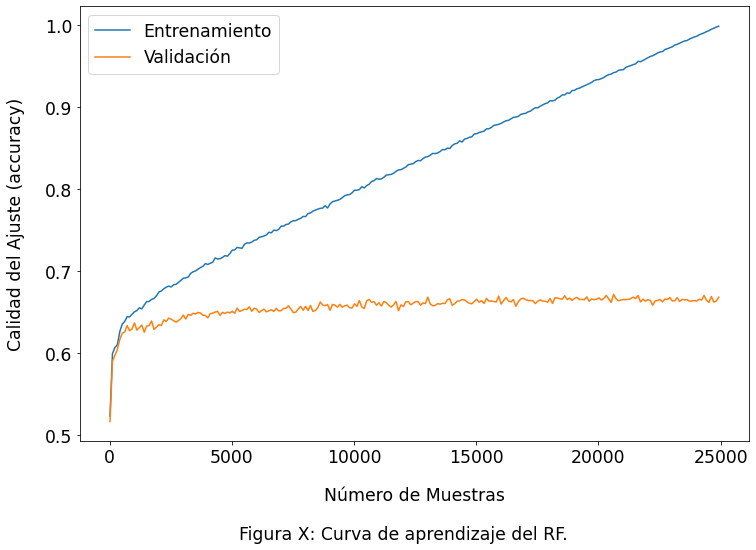

In [ ]:
#Plotear Curva de aprendizaje
fig, axe = plt.subplots(1,1)
fig.set_facecolor("w")
fig.set_figheight(fig.get_figheight()*2)
fig.set_figwidth(fig.get_figwidth()*2)
fig.suptitle('Figura X: Curva de aprendizaje del RF.', fontsize = "xx-large", y=-0.02)

axe.tick_params(labelsize = "xx-large")
axe.set_xlabel("N√∫mero de Muestras", labelpad=20.0, fontsize = "xx-large")
axe.set_ylabel("Calidad del Ajuste (accuracy)", labelpad=20.0, fontsize = "xx-large")
axe.plot(train_sizes, train_scores, label='Entrenamiento')
axe.plot(train_sizes, val_scores, label='Validaci√≥n')
plt.legend(fontsize='xx-large')
plt.show()

Como puede observarse, las prestaciones del modelo (accuracy) para el conjunto de entrenamiento y de validaci√≥n crecen con la proporci√≥n de datos utilizados (del conjunto de entrenamiento) durante el entrenamiento. Efectivamente, el modelo est√° aprendiendo.

# 6.Conclusiones

Ambos algoritmos implementados, tanto el lineal como el no lineal ofrecen un mejor resultado (respecto a la variable de referencia, ‚Äòaccuracy‚Äô) que los ‚Äúdummies‚Äù. Incluso el resto de m√©tricas de error tambi√©n presenta un mejor valor (a excepci√≥n del ‚Äúrecall‚Äù para el siempre positivo, como era de prever). Si bien no ofrecen unos resultados extraordinariamente buenos, son mejores que el de un clasificador aleatorio: 26.11% mejor accuracy en el caso de RF y 20.32% mejor accuracy en el caso de RL.

Modelo | Precision | Recall | F1 | Accuracy | Tiempo
-|-|-|-|-|-|
RF | 0.6746 | 0.7270 | 0.6998 | 0.6684 | 28.6103
RL | 0.6378 | 0.7374 | 0.6839 | 0.6377 | 1.7554
Aleatorio | 0.53 | 0.49 | 0.51 | 0.49  | -
Siempre +1 | 0.53 | 1.00 | 0.69 | 0.53  | -
Siempre -1 | 0.00 | 0.00 | 0.00 | 0.47  | -

El modelo predictivo con mejor valor para la m√©trica de referencia (accuracy) ser√≠a el que se ofrecer√≠a a la empresa Marshable: Random Forest. A fin de proporcionar una estimaci√≥n de c√≥mo se comportar√≠a en un contexto real, se utiliz√≥ el conjunto de test.

In [ ]:
# Mejor modelo encontrado
mejor_modelo = RandomForestClassifier(
      n_estimators=200,
      criterion='gini',
      max_depth=None,
      min_samples_split=2,
      min_samples_leaf=1,
      min_weight_fraction_leaf=0.0,
      max_features='sqrt',
      max_leaf_nodes=None,
      min_impurity_decrease=0.0,
      bootstrap=True,
      oob_score=True,
      n_jobs=None,
      random_state=1234,
      verbose=0,
      warm_start=False,
      class_weight=None,
      ccp_alpha=0.0,
      max_samples=None
  )

# Pipeline
pipe_mm = Pipeline([('preprocessing', preprocessor),('RF', mejor_modelo)])

# Entrenamiento
t0 = time.time()
pipe_mm.fit(X_train, y_train)
t1 = time.time()
t_total = t1-t0
# Test
y_pred_test = pipe_mm.predict(X_test)

In [ ]:
# Tabla de resultados
umbral = 1400
y_test[y_test < umbral] = -1 # Art√≠culos impopulares
y_test[y_test >= umbral ] = 1 # Art√≠culos populares

tabla = pd.DataFrame(columns = ['precision' , 'recall', 'f1', 'accuracy', 'tiempo'])
p = precision_score(y_test, y_pred_test, zero_division=0)
r = recall_score(y_test, y_pred_test, zero_division=0)
f1 = f1_score(y_test, y_pred_test, zero_division=0)
a = accuracy_score(y_test, y_pred_test)
tabla=tabla.append({'precision':p , 'recall':r, 'f1':f1, 'accuracy':a, 'tiempo':t_total}, ignore_index=True)
print('Prestaciones para el conjunto de test: ')
tabla

Prestaciones para el conjunto de test: 


precision    recall        f1  accuracy     tiempo
0   0.686399  0.722473  0.703974  0.673148  48.450371

# 7.Referencias

[1] K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,September, Coimbra, Portugal.

[2] https://mashable.com

[3] David M Blei, Andrew Y Ng, and Michael I Jordan. Latent dirichlet allocation. Journal of Machine Learning Research, 3:993‚Äì1022, 2003.

[4] Tom De Smedt, Lucas Nijs, and Walter Daelemans. Creative web services with pattern. In Proceedings of the Fifth International Conference on Computational Creativity, 2014.

[5] http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

[6] https://scikit-learn.org/

[7] https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

[8] Tom Fawcett. An introduction to roc analysis. Pattern recognition letters, 27(8):861‚Äì874, 2006.

[9] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

[10] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassi#sklearn.linear_model.SGDClassifier

[11] https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710